descargamos el archivo desde el link de google drive proporcionado

In [17]:

from wget import download
from os import path, listdir

if not path.exists("Calidad_de_agua_2022.csv"):
    download("https://drive.google.com/uc?export=download&id=1aT6PJDaXfBu8-tZljO6dK4LZ51Bm29vk")
else:
  print("No vamos a bajar el archivo de casas porque ya existe!")



No vamos a bajar el archivo de casas porque ya existe!


en esta porcion de codigo imprimimos el dataset.

In [18]:
import pandas as pd
raw_dataset = pd.read_csv('Calidad_de_agua_2022.csv', sep=';')

#elimina  la columna inidicada entre '', si axis es 1 indica columna
raw_dataset = raw_dataset.drop('orden', axis=1)
raw_dataset.head(20)

,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,olores,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,TI001,23/2/2022,2022,Verano,24.5,23.3,5.3,6.56,Ausencia,...,6.2,29,90,<0.10,<0.005,<0.001,<10,<0.20,55,Muy deteriorada
1,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,2022,Verano,25.4,23.3,2.25,6.56,Presencia,...,5.8,29,34,<0.10,<0.005,<0.001,<10,<0.20,42,Extremadamente deteriorada
2,Canal Aliviador y Río Lujan,TI002,23/2/2022,2022,Verano,24.6,23.3,2.94,6.59,Ausencia,...,1.9,29,17,<0.10,<0.005,<0.001,<10,0.2,45,Muy deteriorada
3,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,2022,Verano,25.2,23.3,2.22,7.45,Presencia,...,5.8,29,23,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
4,Río Reconquista y Río Lujan,TI004,23/2/2022,2022,Verano,24.1,20,1.02,6.39,Ausencia,...,2.6,59,18,<0.10,<0.005,<0.001,<10,<0.20,44,Extremadamente deteriorada
5,Rio Tigre 100m antes del Rio Luján,TI005,23/2/2022,2022,Verano,24.9,23.3,3.5,6.53,Ausencia,...,3.9,130,8.9,<0.10,<0.005,<0.001,<10,<0.20,40,Extremadamente deteriorada
6,Río Lujan y Canal San Fernando,TI007,23/2/2022,2022,Verano,24.5,20,1.5,6.54,Ausencia,...,3.5,42,12,<0.10,<0.005,<0.001,<10,0.4,35,Extremadamente deteriorada
7,Río Capitán y Río San Antonio,TI008,23/2/2022,2022,Verano,24.5,21,6.3,6.48,Ausencia,...,5.5,69,90,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
8,Arroyo Abra Vieja y Santa Rosa,TI009,23/2/2022,2022,Verano,23.4,21,4.49,6.76,Ausencia,...,1.9,29,39,<0.10,<0.005,<0.001,<10,<0.20,58,Muy deteriorada
9,Del Arca,SF015,23/2/2022,2022,Verano,21.5,23,3.85,6.66,Ausencia,...,1.9,29,28,<0.10,<0.005,<0.001,<10,<0.20,51,Muy deteriorada


vemos que hay valores nulos que no se representan por NaN, valores que significan lo mismo pero estan escrito diferente y demas problemas del tipo, por lo que a continuacion vamos a hacer una limpieza de los datos para poder trabajr sobre el dataset de manera prolija


instalados gdown, wget

con esto podemos ver la cantidad de valores nulos puros (NaN) que contiene cada columna del dataset, pero no todos los nulos estan representados con NaN, por lo que hay que desglosar para ver como se representan y luego reemplazarlos por NaN.

In [19]:

raw_dataset["microcistina_ug_l"].value_counts()

microcistina_ug_l
<0.15                   76
 <0.15                  33
<0.20                   30
no se midió             14
no midieron este día     4
1                        2
0.2                      1
0.3                      1
0.4                      1
 0.21                    1
1.67                     1
 0.25                    1
 0.57                    1
 0.23                    1
0.19                     1
Name: count, dtype: int64

imprimimos las frecuencias absolutas de cada valor de las diferentes columnas,con esto podremos ver como esta representados los valores que hay que limpiar que mencionamos anteriormente

In [20]:
#import pandas as pd

# copiamos el conjunto para preservarlo
preprocessed_dataset = raw_dataset.copy()
# acomodamos la columna de competitors
valores_a_reemplazar = {'no se midió': pd.NA, 'no midieron este día': pd.NA, 'No se midió': pd.NA, 'no midio la sonda': pd.NA, 'no se determinó': pd.NA}
preprocessed_dataset['año'] = preprocessed_dataset['año'].replace(valores_a_reemplazar)
preprocessed_dataset['campaña'] = preprocessed_dataset['campaña'].replace(valores_a_reemplazar)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].replace(valores_a_reemplazar)
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].replace(valores_a_reemplazar)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].replace(valores_a_reemplazar)
preprocessed_dataset['od'] = preprocessed_dataset['od'].replace(valores_a_reemplazar)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(valores_a_reemplazar)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(valores_a_reemplazar)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(valores_a_reemplazar)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(valores_a_reemplazar)
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace(valores_a_reemplazar)
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(valores_a_reemplazar)

preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['ica'] = preprocessed_dataset['ica'].replace(valores_a_reemplazar)

colif_fecales_ufc_100ml, escher_coli_ufc_100ml, enteroc_ufc_100ml, nitrato_mg_l, nh4_mg_l 
son todas columnas que indican o pueden indicar contaminacion, a tener en cuenta para complementar hipotesis de causas de contaminacion.

en estas lineas de codigo estamos limpiando el dataset, reemplazando todos los valores nulos que no estan representados como tales por NaN.
La columna fecha quedo sin limpiar, pero no le veo sentido hacerlo

In [21]:
valores_reemp = {'Ausente': 'Ausencia', 'ausencia' : 'Ausencia', 'Presencia ' : 'Presencia','presencia' : 'Presencia'}
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(valores_reemp)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(valores_reemp)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(valores_reemp)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(valores_reemp)


Detectamos que en varias columnas hay muchos valores que refieren al mismo significado (como ausencia, Ausente, Ausencia) sin agregar informacion extra, por lo que utilizamos un unico valor para emprolijar el dataset.

revisar, en la columna dqo_mg_l hay valores <30 y con valor 29 en distintas categorias.
La columna hidr_deriv_petr_ug_l tiene un problem con el valor <0.10
El mismo problema en la columna microcistina_ug_l
en la columna cr_total_mg_l hay un valor q dice <5.0 y todos sus valores son menor a eso, no tiene sentido
en la columna nh4_mg_l (presencia de amoniaco, contaminacion organica) hay un valor <0.05 y 12 valores 0.049, hay q ver si los metemos todos juntos

In [22]:
preprocessed_dataset['olores'] = (preprocessed_dataset['olores'] == 'Presencia').astype(int)
preprocessed_dataset['color'] = (preprocessed_dataset['color'] == 'Presencia').astype(int)
preprocessed_dataset['espumas'] = (preprocessed_dataset['espumas'] == 'Presencia').astype(int)
preprocessed_dataset['mat_susp'] = (preprocessed_dataset['mat_susp'] == 'Presencia').astype(int)


con este codigo pasamos una variable categorica (como 'olores') a booleana, ya que en esta columna solamente se indica la prescencia o ausencia de olores
lo mismo para las columnas espumas, color, mat_susp.
1 indica presencia y 0 ausencia

In [23]:
preprocessed_dataset = pd.get_dummies(preprocessed_dataset, columns=['calidad_de_agua'])

como la columna contaba solo con 3 valores (Deteriorada, muy deteriorada y extremadamente deteriorada) converti esas variables a dummies para poder trabajr mas comodo

In [24]:

# Supongamos que tienes un DataFrame llamado df
preprocessed_dataset['num_nan'] = preprocessed_dataset.isnull().sum(axis=1)

agrego una columna que me indique la cantidad de nulls de cada fila

In [25]:
aux = preprocessed_dataset[["sitios","num_nan", "tem_agua", "tem_aire", "od", "ph", "olores", "color", "espumas", "mat_susp" ,"colif_fecales_ufc_100ml" ,"escher_coli_ufc_100ml" ,"enteroc_ufc_100ml" ,"nitrato_mg_l", "nh4_mg_l", "calidad_de_agua_Deteriorada" ,"calidad_de_agua_Extremadamente deteriorada" ,"calidad_de_agua_Muy deteriorada"]]

consideramos que los individuos que contengan mas de 15 valores nulos no aportan mucha informacion, por lo que se pueden eliminar

In [26]:
# Supongamos que la columna se llama 'columna_a_filtrar'
filas_filtradas = preprocessed_dataset[preprocessed_dataset['num_nan'] >= 15]
indices_a_eliminar = filas_filtradas.index
preprocessed_dataset.drop(index=indices_a_eliminar, inplace=True)

In [27]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 167
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   sitios                                      154 non-null    object
 1   codigo                                      154 non-null    object
 2   fecha                                       154 non-null    object
 3   año                                         154 non-null    object
 4   campaña                                     154 non-null    object
 5   tem_agua                                    144 non-null    object
 6   tem_aire                                    143 non-null    object
 7   od                                          131 non-null    object
 8   ph                                          139 non-null    object
 9   olores                                      154 non-null    int64 
 10  color                          

In [28]:
preprocessed_dataset['tem_agua'] = pd.to_numeric(preprocessed_dataset['tem_agua'], errors='coerce')
preprocessed_dataset['tem_aire'] = pd.to_numeric(preprocessed_dataset['tem_aire'], errors='coerce')

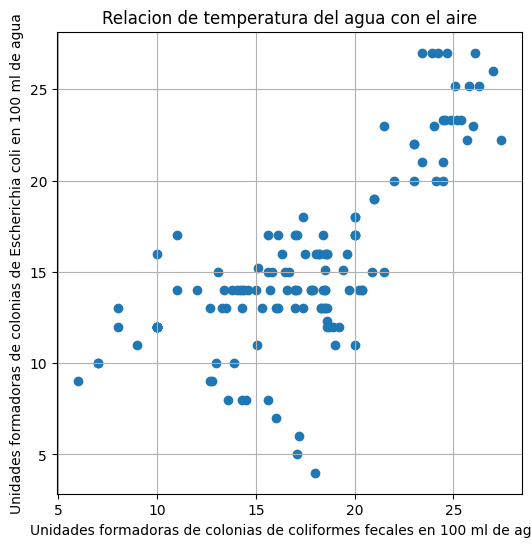

In [29]:
import matplotlib.pyplot as plt
mask = preprocessed_dataset['tem_agua'].notnull() & preprocessed_dataset['escher_coli_ufc_100ml'].notnull()
#plt.plot(preprocessed_dataset[mask]["colif_fecales_ufc_100ml"], preprocessed_dataset[mask]["escher_coli_ufc_100ml"])
plt.figure(figsize=(6,6))
plt.scatter(preprocessed_dataset[mask]["tem_agua"], preprocessed_dataset[mask]["tem_aire"])
plt.xlabel("Unidades formadoras de colonias de coliformes fecales en 100 ml de agua")
plt.ylabel("Unidades formadoras de colonias de Escherichia coli en 100 ml de agua")

plt.title("Relacion de temperatura del agua con el aire")
plt.grid(True)

plt.show()

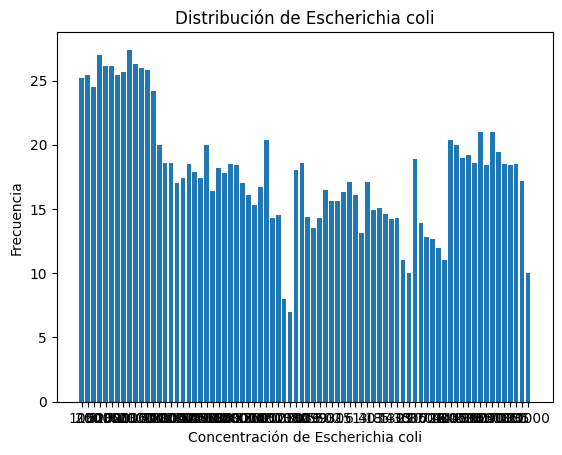

In [30]:
mask = preprocessed_dataset['escher_coli_ufc_100ml'].notnull() & preprocessed_dataset['tem_agua'].notnull()
plt.bar(preprocessed_dataset[mask]["escher_coli_ufc_100ml"],preprocessed_dataset[mask]["tem_agua"])
plt.title('Distribución de Escherichia coli')
plt.xlabel('Concentración de Escherichia coli')
plt.ylabel('Frecuencia')
plt.show()

In [31]:
preprocessed_dataset['escher_coli_ufc_100ml']=pd.to_numeric(preprocessed_dataset['escher_coli_ufc_100ml'], errors='coerce')

In [32]:
preprocessed_dataset['colif_fecales_ufc_100ml']=pd.to_numeric(preprocessed_dataset['colif_fecales_ufc_100ml'], errors='coerce')

In [33]:
preprocessed_dataset['enteroc_ufc_100ml']=pd.to_numeric(preprocessed_dataset['enteroc_ufc_100ml'], errors='coerce')

In [34]:
preprocessed_dataset.head(50)

,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,olores,...,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua_Deteriorada,calidad_de_agua_Extremadamente deteriorada,calidad_de_agua_Muy deteriorada,num_nan
0,Canal Villanueva y Río Luján,TI001,23/2/2022,2022,Verano,24.5,23.3,5.3,6.56,0,...,<0.10,<0.005,<0.001,<10,<0.20,55,False,False,True,0
1,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,2022,Verano,25.4,23.3,2.25,6.56,1,...,<0.10,<0.005,<0.001,<10,<0.20,42,False,True,False,0
2,Canal Aliviador y Río Lujan,TI002,23/2/2022,2022,Verano,24.6,23.3,2.94,6.59,0,...,<0.10,<0.005,<0.001,<10,0.2,45,False,False,True,0
3,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,2022,Verano,25.2,23.3,2.22,7.45,1,...,<0.10,<0.005,<0.001,<10,<0.20,46,False,False,True,0
4,Río Reconquista y Río Lujan,TI004,23/2/2022,2022,Verano,24.1,20.0,1.02,6.39,0,...,<0.10,<0.005,<0.001,<10,<0.20,44,False,True,False,0
5,Rio Tigre 100m antes del Rio Luján,TI005,23/2/2022,2022,Verano,24.9,23.3,3.5,6.53,0,...,<0.10,<0.005,<0.001,<10,<0.20,40,False,True,False,0
6,Río Lujan y Canal San Fernando,TI007,23/2/2022,2022,Verano,24.5,20.0,1.5,6.54,0,...,<0.10,<0.005,<0.001,<10,0.4,35,False,True,False,0
7,Río Capitán y Río San Antonio,TI008,23/2/2022,2022,Verano,24.5,21.0,6.3,6.48,0,...,<0.10,<0.005,<0.001,<10,<0.20,46,False,False,True,0
8,Arroyo Abra Vieja y Santa Rosa,TI009,23/2/2022,2022,Verano,23.4,21.0,4.49,6.76,0,...,<0.10,<0.005,<0.001,<10,<0.20,58,False,False,True,0
9,Del Arca,SF015,23/2/2022,2022,Verano,21.5,23.0,3.85,6.66,0,...,<0.10,<0.005,<0.001,<10,<0.20,51,False,False,True,0
